In [1]:
import tweepy
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import re
import nltk
from nltk.tokenize import RegexpTokenizer, WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import string
from string import punctuation

from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import jaccard_score
from textblob import TextBlob

In [2]:
consumer_key = "ECBbE9l23Sa5l3AmPL0hLBgYi" 
consumer_secret = "8dauUOkVwx97Ft7TTmpsOE4pmYmql6CGX2IgLYqTUop68RxR1n"  
access_key = "1547096477096222720-PFklNggMjVu0F5F8vu0A36TqEWvGs6"
access_secret = "OS9ctux8A8PITsoVEEtSH4UX8befIooute8M1PdOyPjQI"

client = tweepy.Client(bearer_token='AAAAAAAAAAAAAAAAAAAAANUXewEAAAAA6ksGC9aMTphiEPejDgUD3jD4rHc%3D0aRAHlrvwVZIM6YnPSU4O8kxOlI47zPaEzRR6RUcf1sU83IMty')

In [3]:
# Twitter authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)   
auth.set_access_token(access_key, access_secret) 
  
# Creating an API object 
api = tweepy.API(auth)

In [4]:
QUERY = "#FIFA OR #football -is:retweet lang:en"
new_list = []
for i in tweepy.Paginator(client.search_recent_tweets, query=QUERY,tweet_fields=['context_annotations', 'created_at',
                                                                                 'author_id'], max_results=100).flatten(limit=900):
    uid = i.author_id
    user = api.get_user(user_id=uid)
    refined_tweet = {'text' : i.text,
                     'user_name' : user.name,
                     'created_at' : i.created_at,
                     'verified_user': user.verified,
                     'location' : user.location
                    }

    new_list.append(refined_tweet)
    print(refined_tweet)

{'text': 'RT @PlayEldarune: When #bitcoin hits 27.000. \n\nThe Community 👇\n\nBtw, who remembers #fifa 99? 😁\n\n#BTC https://t.co/CCBQH2VHfY', 'user_name': 'Mekqz', 'created_at': datetime.datetime(2023, 3, 17, 14, 3, 14, tzinfo=datetime.timezone.utc), 'verified_user': False, 'location': ''}
{'text': "#football #foot #HappyBirthday Some today's birthday of players in activity  17/03/2023  \n#calcio #Fussball  #fotball #Futebol #futebolamericano #footballindex #OLFCN #NFONEW #RealValladolidAthletic https://t.co/5HnAzyIhh6", 'user_name': 'YanMae', 'created_at': datetime.datetime(2023, 3, 17, 14, 3, 11, tzinfo=datetime.timezone.utc), 'verified_user': False, 'location': 'Sainte-Anne-sur-Brivet, France'}
{'text': '#FIFAWWC2023 #FIFArabCup #FIFA #FameYourGame #MondayMotivation #ClubWC \nOriginal: FIFAWWC https://t.co/SKlmDak8pd', 'user_name': 'Heather Jones', 'created_at': datetime.datetime(2023, 3, 17, 14, 3, 10, tzinfo=datetime.timezone.utc), 'verified_user': False, 'location': ''}
{'text':

In [5]:
df = pd.DataFrame(new_list)
print(df)


                                                  text  \
0    RT @PlayEldarune: When #bitcoin hits 27.000. \...   
1    #football #foot #HappyBirthday Some today's bi...   
2    #FIFAWWC2023 #FIFArabCup #FIFA #FameYourGame #...   
3    RT @PlayEldarune: When #bitcoin hits 27.000. \...   
4    Which signings got 'A' grades this week? We st...   
..                                                 ...   
895  Please join our New #Facebook Group .. Full of...   
896  Please join our New #Facebook Group .. Full of...   
897  DM me if needing Promo between now and Sunday....   
898  “A better future for football” @FairGameUK con...   
899  ❤️❤️ #FIFArabCup #FIFA #FIFAWWC2023 #DiaIntern...   

                   user_name                created_at  verified_user  \
0                      Mekqz 2023-03-17 14:03:14+00:00          False   
1                     YanMae 2023-03-17 14:03:11+00:00          False   
2              Heather Jones 2023-03-17 14:03:10+00:00          False   
3          

In [6]:
df.head()

,text,user_name,created_at,verified_user,location
0,RT @PlayEldarune: When #bitcoin hits 27.000. \...,Mekqz,2023-03-17 14:03:14+00:00,False,
1,#football #foot #HappyBirthday Some today's bi...,YanMae,2023-03-17 14:03:11+00:00,False,"Sainte-Anne-sur-Brivet, France"
2,#FIFAWWC2023 #FIFArabCup #FIFA #FameYourGame #...,Heather Jones,2023-03-17 14:03:10+00:00,False,
3,RT @PlayEldarune: When #bitcoin hits 27.000. \...,@FarhanIshu21,2023-03-17 14:03:07+00:00,False,
4,Which signings got 'A' grades this week? We st...,pigskinupdate,2023-03-17 14:03:01+00:00,False,United States


In [7]:
print(df)

                                                  text  \
0    RT @PlayEldarune: When #bitcoin hits 27.000. \...   
1    #football #foot #HappyBirthday Some today's bi...   
2    #FIFAWWC2023 #FIFArabCup #FIFA #FameYourGame #...   
3    RT @PlayEldarune: When #bitcoin hits 27.000. \...   
4    Which signings got 'A' grades this week? We st...   
..                                                 ...   
895  Please join our New #Facebook Group .. Full of...   
896  Please join our New #Facebook Group .. Full of...   
897  DM me if needing Promo between now and Sunday....   
898  “A better future for football” @FairGameUK con...   
899  ❤️❤️ #FIFArabCup #FIFA #FIFAWWC2023 #DiaIntern...   

                   user_name                created_at  verified_user  \
0                      Mekqz 2023-03-17 14:03:14+00:00          False   
1                     YanMae 2023-03-17 14:03:11+00:00          False   
2              Heather Jones 2023-03-17 14:03:10+00:00          False   
3          

In [8]:
# remove the hashtags, mentions and unwanted characters.
def clean_text(df, text_field):
    df[text_field] = df[text_field].str.replace(r'\s*https?://\S+(\s+|$)', ' ',regex=True).str.strip()
    df = df.replace(r'[^0-9a-zA-Z ]', '', regex=True).replace("'", '')
    return df

tweets_bowl = clean_text(df, 'text')
tweets_bowl.head()

,text,user_name,created_at,verified_user,location
0,RT PlayEldarune When bitcoin hits 27000 The Co...,Mekqz,2023-03-17 14:03:14+00:00,False,
1,football foot HappyBirthday Some todays birthd...,YanMae,2023-03-17 14:03:11+00:00,False,SainteAnnesurBrivet France
2,FIFAWWC2023 FIFArabCup FIFA FameYourGame Monda...,Heather Jones,2023-03-17 14:03:10+00:00,False,
3,RT PlayEldarune When bitcoin hits 27000 The Co...,FarhanIshu21,2023-03-17 14:03:07+00:00,False,
4,Which signings got A grades this week We stack...,pigskinupdate,2023-03-17 14:03:01+00:00,False,United States


In [9]:
tokenizer = RegexpTokenizer(r'\w+')
lemmatizer = WordNetLemmatizer()
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation) #already taken care of with the cleaning function.
stop.update(punctuation)
w_tokenizer = WhitespaceTokenizer()

def furnished(text):
    final_text = []
    for i in w_tokenizer.tokenize(text):
        if i.lower() not in stop:
            word = lemmatizer.lemmatize(i)
            final_text.append(word.lower())
    return " ".join(final_text)
tweets_bowl.text = tweets_bowl.text.apply(furnished)
tweets_bowl.head()

,text,user_name,created_at,verified_user,location
0,rt playeldarune bitcoin hit 27000 community bt...,Mekqz,2023-03-17 14:03:14+00:00,False,
1,football foot happybirthday today birthday pla...,YanMae,2023-03-17 14:03:11+00:00,False,SainteAnnesurBrivet France
2,fifawwc2023 fifarabcup fifa fameyourgame monda...,Heather Jones,2023-03-17 14:03:10+00:00,False,
3,rt playeldarune bitcoin hit 27000 community bt...,FarhanIshu21,2023-03-17 14:03:07+00:00,False,
4,signing got grade week stacked top 11 deal nfl...,pigskinupdate,2023-03-17 14:03:01+00:00,False,United States


In [10]:
economy_related_words = '''finance
consumption
financial
sociology
trade
economist
investment
economy
business
economical
service
political
good
macroeconomic
fiscal
social science
production
politics
economics
psychology
geography
mathematics
economics professor
science
geopolitics
political economy
theology
professor
distribution
physics
humanities
professor emeritus
emeritus professor
worldly
profitable
currency
efficient
thesis
ecology
criminology
geology
government
demography
philosophy
linguistics
history
calculus
pennsylvania wharton
fundamentals
tech
math'''

In [11]:
social_related_words = '''political
cultural
sociable
sms
societal
society
friendly
gregarious
interpersonal
economic
politics
party
welfare
mixer
socialization
socially
societies
intellectual
community
religious
educational
personal
sociality
health
public
socio
ethnic
development
socialist
social
civic
emotional
social networking
social network
socio economic
facebook
activism
internet
socio cultural
media
connectedness
twitter
civic engagement
socialism
social networking sites
reddit
'''

In [12]:
health_related_words = '''safety
medical
wellness
welfare
disease
obesity
healthy
nutrition
well-being
health care
hygiene
world health organization
medicine
healthcare
fitness
medicare
public health
diet
exercise
nursing
wellbeing
life
stress
care
education
social
epidemiology
mental health
health
insurance
sanitation
mental
illness
damage
tobacco cessation
hospitals
infectious disease
condition
research
aids
armor
doctors
environmental
heath care
chronic diseases
shield
stamina
dental
healthiness
age
healthy lifestyles
preventive
ammo
reproductive
body
weight
nutritional
disabilities
families
improve
addiction
benefit
global health
musclebound
checkups
healthy live
be in shape
chronic illnesses
communicable diseases
chronic illness
preventative
immunizations
smoking cessation
science
prenatal care
energy
physical fitness
mana
eating habits
drug
substance
maternal
suicide
shields
health care provider
hospital
healthier lifestyles
defense
patient
food
human body
family
personal
diabetes hypertension
lives
agriculture
health science
health policy
epidemiological
attack
lifestyle
self
well
influenza vaccination
government
weight loss
healing
anxiety
dietary habits
pre natal
beauty
chronically ill
financial
gym
emergency preparedness
sanity
quality
happiness
'''

In [13]:
culture_related_words = '''society
civilization
philosophy
anthropology
subculture
acculturation
religion
cultivation
nationalism
counterculture
cultural
ideology
art
popular culture
folklore
agriculture
country
writing
music
monoculture
cyberculture
language
social class
high culture
cultural studies
cultural anthropology
cooking
literature
science
growth
tillage
grow
ritual
perfection
development
metaphor
concept
symbol
mythology
gender
tradition
archaeology
clothing
edward burnett tylor
traditions
traditional
western culture
contemporary
multiculturalism
elite
politics
ethnicity'''

In [14]:
economy = furnished(economy_related_words)
social = furnished(social_related_words)
culture = furnished(culture_related_words)
health = furnished(health_related_words)

In [15]:
string1 = economy
words = string1.split()
economy = " ".join(sorted(set(words), key=words.index))
economy
string1 = social
words = string1.split()
social = " ".join(sorted(set(words), key=words.index))
social
string1 = health
words = string1.split()
health = " ".join(sorted(set(words), key=words.index))
health
string1 = culture
words = string1.split()
culture = " ".join(sorted(set(words), key=words.index))
culture

'society civilization philosophy anthropology subculture acculturation religion cultivation nationalism counterculture cultural ideology art popular culture folklore agriculture country writing music monoculture cyberculture language social class high study cooking literature science growth tillage grow ritual perfection development metaphor concept symbol mythology gender tradition archaeology clothing edward burnett tylor traditional western contemporary multiculturalism elite politics ethnicity'

In [16]:
def jaccard_similarity(query, document):
    intersection = set(query).intersection(set(document))
    union = set(query).union(set(document))
    return len(intersection)/len(union)

def get_scores(group,tweets):
    scores = []
    for tweet in tweets:
        s = jaccard_similarity(group, tweet)
        scores.append(s)
    return scores


e_scores = get_scores(economy, tweets_bowl.text.to_list())
s_scores = get_scores(social, tweets_bowl.text.to_list())
c_scores = get_scores(culture, tweets_bowl.text.to_list())
h_scores = get_scores(health, tweets_bowl.text.to_list())

In [17]:
# create a jaccard scored df.
data  = {'names':tweets_bowl.user_name.to_list(), 'economic_score':e_scores,
         'social_score': s_scores, 'culture_score':c_scores, 'health_scores':h_scores}
scores_df = pd.DataFrame(data)
print(scores_df)

                       names  economic_score  social_score  culture_score  \
0                      Mekqz        0.769231      0.689655       0.714286   
1                     YanMae        0.750000      0.733333       0.700000   
2              Heather Jones        0.800000      0.714286       0.740741   
3               FarhanIshu21        0.769231      0.689655       0.714286   
4              pigskinupdate        0.708333      0.692308       0.720000   
..                       ...             ...           ...            ...   
895            Xplore Footy         0.807692      0.851852       0.814815   
896           Xplore Boxing         0.807692      0.851852       0.814815   
897  Tom White Football Tips        0.909091      0.800000       0.833333   
898                Matt Dean        0.782609      0.760000       0.791667   
899          Gregory Hubbard        0.769231      0.689655       0.714286   

     health_scores  
0         0.645161  
1         0.687500  
2         0.

In [18]:
#assign classes based on highest score
def get_classes(l1, l2, l3, l4):
    econ = []
    socio = []
    cul = []
    heal = []
    for i, j, k, l in zip(l1, l2, l3, l4):
        m = max(i, j, k, l)
        if m == i:
            econ.append(1)
        else:
            econ.append(0)
        if m == j:
            socio.append(1)
        else:
            socio.append(0)        
        if m == k:
            cul.append(1)
        else:
            cul.append(0)  
        if m == l:
            heal.append(1)
        else:
            heal.append(0)   
            
    return econ, socio, cul, heal

In [19]:
l1 = scores_df.economic_score.to_list()
l2 = scores_df.social_score.to_list()
l3 = scores_df.culture_score.to_list()
l4 = scores_df.health_scores.to_list()

In [20]:
econ, socio, cul, heal = get_classes(l1, l2, l3, l4)

In [21]:
data = {'name': scores_df.names.to_list(), 'economic':econ, 'social':socio, 'culture':cul, 'health': heal}
class_df = pd.DataFrame(data)
#grouping the tweets by username
new_groups_df = class_df.groupby(['name']).sum()
#add a new totals column
new_groups_df['total'] = new_groups_df['health'] + new_groups_df['culture'] + new_groups_df['social'] +  new_groups_df['economic']
#add a new totals row
new_groups_df.loc["Total"] = new_groups_df.sum()  

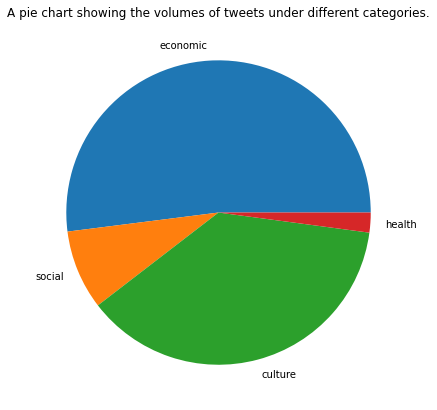

economic    468
social       76
culture     337
health       19
Name: Total, dtype: int64


In [22]:
fig = plt.figure(figsize =(10, 7)) 
a = new_groups_df.drop(['total'], axis = 1)
plt.pie(a.loc['Total'], labels = a.columns)
plt.title('A pie chart showing the volumes of tweets under different categories.')
plt.show()
print(a.loc['Total'])

In [23]:
print(tweets_bowl)

                                                  text  \
0    rt playeldarune bitcoin hit 27000 community bt...   
1    football foot happybirthday today birthday pla...   
2    fifawwc2023 fifarabcup fifa fameyourgame monda...   
3    rt playeldarune bitcoin hit 27000 community bt...   
4    signing got grade week stacked top 11 deal nfl...   
..                                                 ...   
895  please join new facebook group full main news ...   
896  please join new facebook group full main news ...   
897  dm needing promo sunday football horseracing c...   
898  better future football fairgameuk conference g...   
899  fifarabcup fifa fifawwc2023 diainternacionalde...   

                   user_name                created_at  verified_user  \
0                      Mekqz 2023-03-17 14:03:14+00:00          False   
1                     YanMae 2023-03-17 14:03:11+00:00          False   
2              Heather Jones 2023-03-17 14:03:10+00:00          False   
3          

In [24]:
text_df = tweets_bowl.drop(['created_at','verified_user','location'], axis=1)

In [25]:
print(text_df)

                                                  text  \
0    rt playeldarune bitcoin hit 27000 community bt...   
1    football foot happybirthday today birthday pla...   
2    fifawwc2023 fifarabcup fifa fameyourgame monda...   
3    rt playeldarune bitcoin hit 27000 community bt...   
4    signing got grade week stacked top 11 deal nfl...   
..                                                 ...   
895  please join new facebook group full main news ...   
896  please join new facebook group full main news ...   
897  dm needing promo sunday football horseracing c...   
898  better future football fairgameuk conference g...   
899  fifarabcup fifa fifawwc2023 diainternacionalde...   

                   user_name  
0                      Mekqz  
1                     YanMae  
2              Heather Jones  
3               FarhanIshu21  
4              pigskinupdate  
..                       ...  
895            Xplore Footy   
896           Xplore Boxing   
897  Tom White Football 

In [26]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [27]:
text_df['polarity'] = text_df['text'].apply(polarity)

In [28]:
text_df.head(10)

,text,user_name,polarity
0,rt playeldarune bitcoin hit 27000 community bt...,Mekqz,0.000
1,football foot happybirthday today birthday pla...,YanMae,0.000
2,fifawwc2023 fifarabcup fifa fameyourgame monda...,Heather Jones,0.375
3,rt playeldarune bitcoin hit 27000 community bt...,FarhanIshu21,0.000
4,signing got grade week stacked top 11 deal nfl...,pigskinupdate,0.500
5,rt fifacomar 100,,0.000
6,rt fifacomar 100,Mohammed Helal,0.000
7,rt fifacomar 100,ahmed,0.000
8,rt playeldarune bitcoin hit 27000 community bt...,Rahmanoume11,0.000
9,rt fifacomar 100,mohamed farouk,0.000


In [29]:
def sentiment(label):
    if label <0:
        return "Negative"
    elif label ==0:
        return "Neutral"
    elif label>0:
        return "Positive"

In [30]:
text_df['sentiment'] = text_df['polarity'].apply(sentiment)

In [31]:
text_df.head()

,text,user_name,polarity,sentiment
0,rt playeldarune bitcoin hit 27000 community bt...,Mekqz,0.000,Neutral
1,football foot happybirthday today birthday pla...,YanMae,0.000,Neutral
2,fifawwc2023 fifarabcup fifa fameyourgame monda...,Heather Jones,0.375,Positive
3,rt playeldarune bitcoin hit 27000 community bt...,FarhanIshu21,0.000,Neutral
4,signing got grade week stacked top 11 deal nfl...,pigskinupdate,0.500,Positive


<AxesSubplot:xlabel='sentiment', ylabel='count'>

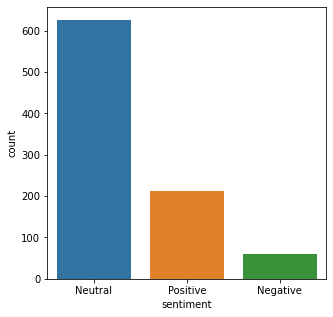

In [32]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='sentiment', data = text_df)

Text(0.5, 1.0, 'Distribution of sentiments')

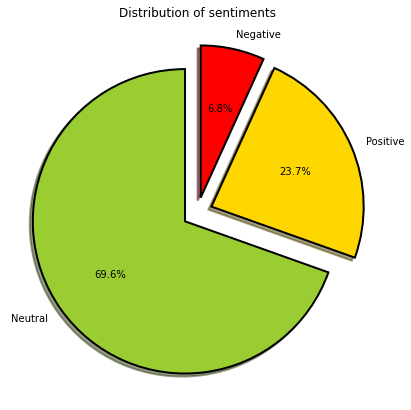

In [33]:
fig = plt.figure(figsize=(7,7))
colors = ("yellowgreen", "gold", "red")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = text_df['sentiment'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')


In [34]:
pos_tweets = text_df[text_df.sentiment == 'Positive']
pos_tweets = pos_tweets.sort_values(['polarity'], ascending= False)
pos_tweets.head()

,text,user_name,polarity,sentiment
607,best player fifa world cup 2022 lionel messi v...,FootyNotes,1.0,Positive
662,best fifa 23 custom tactic meta formation play...,FIFA 23 FUT,1.0,Positive
840,eluemunor kolton best tackle duo afc west nfl ...,Raw Chili,1.0,Positive
141,best duo football fifa barcelona,Mohhamad Sufair,1.0,Positive
137,perfect timingtrending trending2023 football s...,FAISAL,1.0,Positive


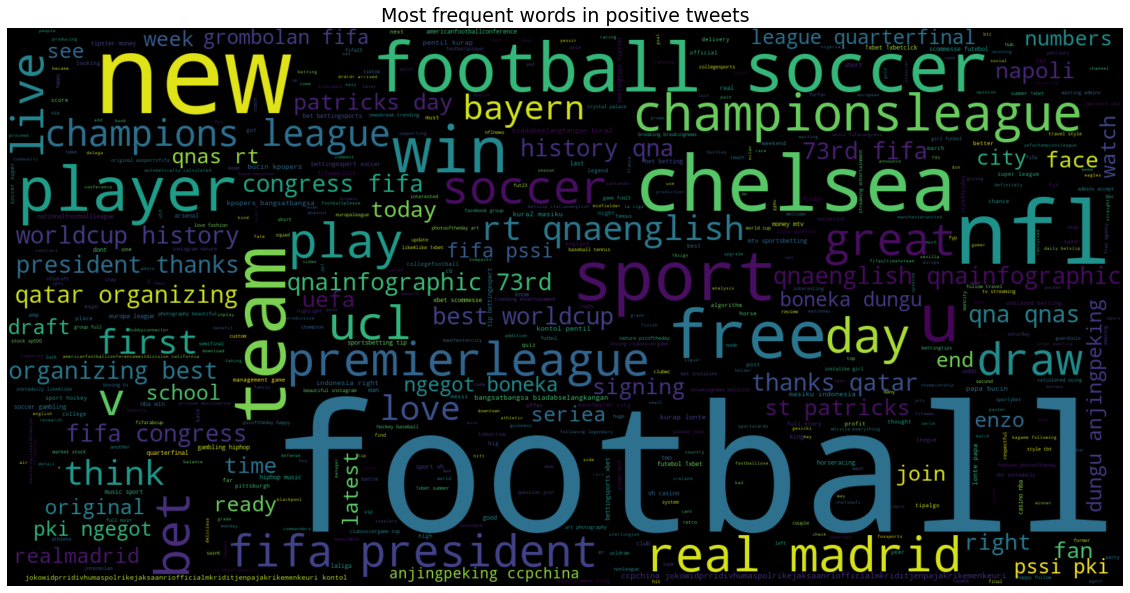

In [35]:
text = ' '.join([word for word in pos_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in positive tweets', fontsize=19)
plt.show()

In [36]:
neg_tweets = text_df[text_df.sentiment == 'Negative']
neg_tweets = neg_tweets.sort_values(['polarity'], ascending= False)
neg_tweets.head()

,text,user_name,polarity,sentiment
877,new season football back year longawaited game...,Hangzhoufeel,-0.009091,Negative
127,champions league draw full man city face bayer...,Topviewsports,-0.019444,Negative
636,u18 upp cup final long stratton fc v costessey...,Whats On Essex East Anglia TicketSource,-0.025000,Negative
268,rt equidemorg fifa talk good game action show ...,Chrystal Symons,-0.025000,Negative
709,rt equidemorg fifa talk good game action show ...,Jonathan Harrison,-0.025000,Negative


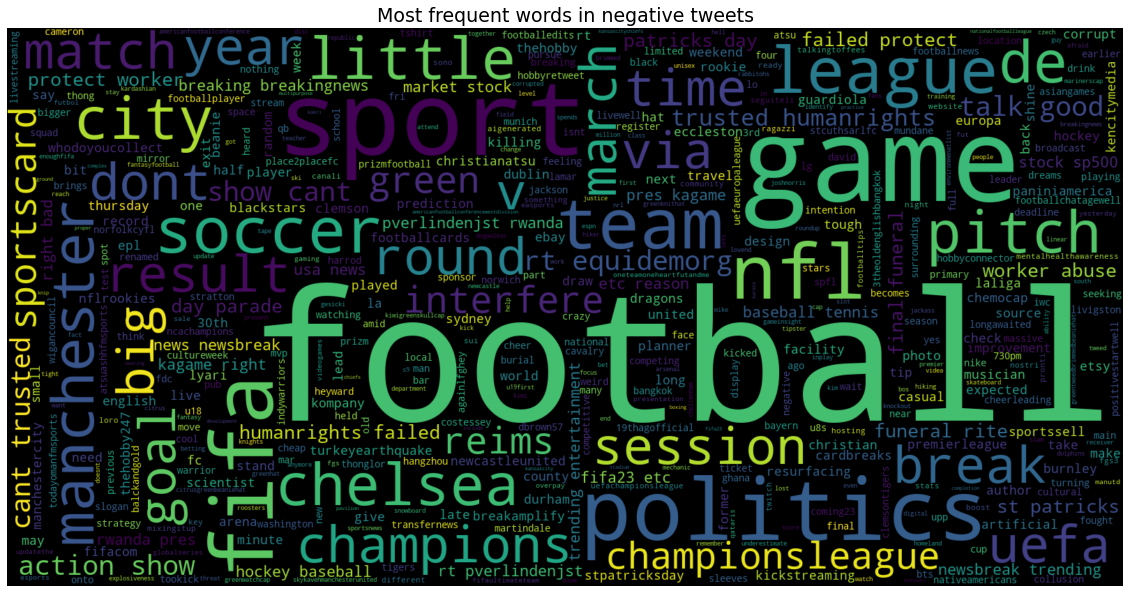

In [37]:
text = ' '.join([word for word in neg_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in negative tweets', fontsize=19)
plt.show()

In [38]:
neutral_tweets = text_df[text_df.sentiment == 'Neutral']
neutral_tweets = neutral_tweets.sort_values(['polarity'], ascending= False)
neutral_tweets.head()

,text,user_name,polarity,sentiment
0,rt playeldarune bitcoin hit 27000 community bt...,Mekqz,0.0,Neutral
583,sportsmedia sportsbusiness nfl nba aaronrodger...,Out of Our League,0.0,Neutral
575,rt playeldarune bitcoin hit 27000 community bt...,Nikola Tesla,0.0,Neutral
576,rt playeldarune bitcoin hit 27000 community bt...,Aljamoos Koii,0.0,Neutral
577,want buybutyl rubbermooney viscosity ml 1 8 12...,Trade Tracks,0.0,Neutral


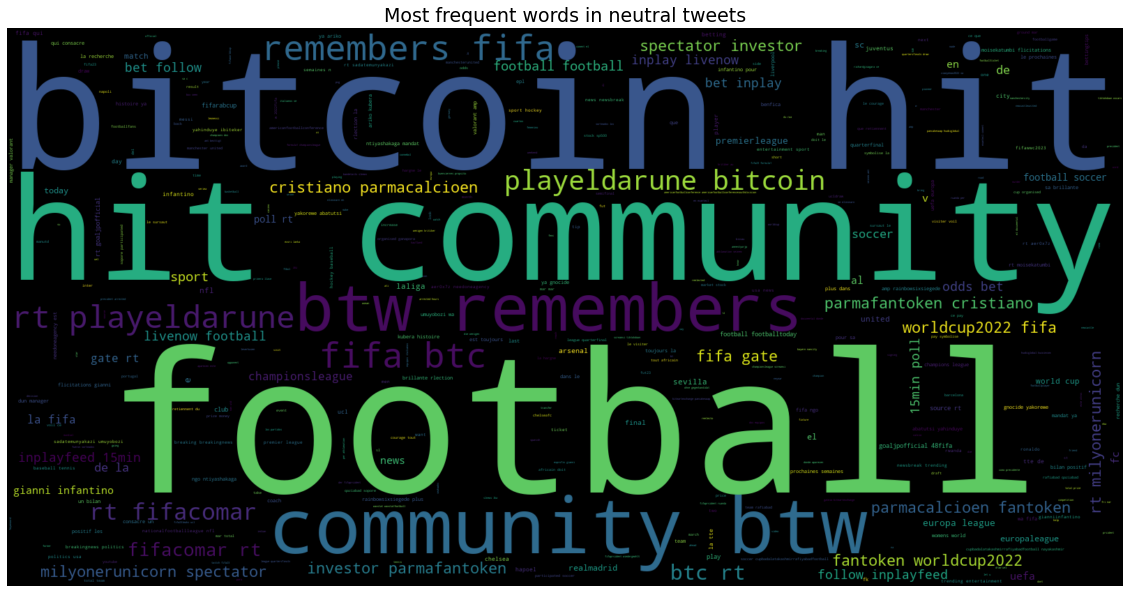

In [39]:
text = ' '.join([word for word in neutral_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in neutral tweets', fontsize=19)
plt.show()
